In [1]:
%pylab inline
import numpy as np
import scipy
import io
import base64
from IPython.display import HTML, Image
from scipy.stats import binom, poisson
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle, Rectangle

## Customising the font size
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [16,8]

Populating the interactive namespace from numpy and matplotlib


In [30]:
nStudents = 20
nFemale = 3
k = nFemale
cl = 0.80
poisson.pmf(0,2)
#poisson.ppf(0.1,2.4)
#poisson.cdf(0,2.4)

0.1353352832366127

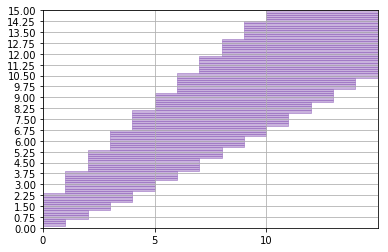

In [29]:
def get_central_interval(cl, k):
    # calculate r- and r+ based on pre-defined functions
    rm = poisson.ppf(0.5*(1-cl), k)
    rp = poisson.ppf(0.5*(1-cl) + cl, k)
    return rm, rp

def get_central_interval_details(cl, k):
    # calculate r- and r+ based on calculation of sums of probabilities
    sump = 0.
    summ = 0.
    foundp = False
    foundm = False
    rv = poisson(k) # initialise binomial distribution
    for x in range(0,n+1):
        p = rv.pmf(x) # obtain probability
        sump += p
        if not foundp and 0.5*(1-cl) + cl <= sump: # check for first time exceeding threshold
            rp = x
            foundp = True
        p = rv.pmf(n-x) # obtain probability, summing up from maximum backwards
        summ += p
        if not foundm and 0.5*(1-cl) + cl <= summ: # check for first time exceeding threshold
            rm = n-x
            foundm = True
    return rm, rp

nSamples = 100 # defines granularity in y (=probability)
poisson_patches = []
for i in range(1,nSamples):
    thisk = 1. * i * 5 * k / nSamples # translate into probability
    #rm, rp = get_central_interval_details(0.95, nStudents, pFemale) # use detailed calculation
    rm, rp = get_central_interval(cl, thisk) # use fast implementation
    poisson_patches.append( Rectangle((rm,thisk),rp-rm,5.*k/nSamples) ) # define drawing object for confidence interval
poissons = PatchCollection(poisson_patches, alpha=0.5, color='tab:purple') # drawing object for complete belt

fig, ax = plt.subplots()
ax.set_xlim(0,5*k) # set x axis range
ax.set_ylim(0,5*k)         # set y axis range

ax.add_collection(poissons) # draw belt

# plot optics
ax.set_yticks([x*5*k/20. for x in range(21)])
ax.set_xticks([5*x for x in range(k)])
ax.grid(which='both',axis='x')
ax.grid(which='major',axis='y')

# reality check
#ax.plot([0,nStudents],[0.26]*2)
#ax.plot([nFemale]*2,[0,1])

plt.show()

In [35]:
print(poisson.pmf(0,6)+poisson.pmf(1,6)+poisson.pmf(2,6)+poisson.pmf(3,6))

0.15120388277664787
